<a href="https://colab.research.google.com/github/vishakhun/Data_Analysis/blob/main/Machine_Learning_Model_Comparison_for_Credit_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Model Comparison for Credit Risk Prediction

---



In this notebook, we will explore and compare the performance of several machine learning models on the Statlog German Credit Data. We aim to predict credit risk using features provided in the dataset. The models we will compare include:

1. XGBoost Classifier
2. Support Vector Classifier (SVC)
3. Random Forest Classifier
4. Neural Network Classifier (MLPClassifier)
5. Logistic Regression




## Importing Necessary Libraries

We begin by importing the necessary Python libraries for data manipulation, visualization, and machine learning.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score, precision_recall_curve, f1_score
from sklearn.preprocessing import label_binarize
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import itertools
import seaborn as sns; sns.set_theme()
from tabulate import tabulate

## Fetching the Dataset

We use `ucimlrepo` to fetch the Statlog German Credit Data directly from the UCI Machine Learning Repository.


In [ ]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# Fetch the dataset
statlog_german_credit_data = fetch_ucirepo(id=144)
X = statlog_german_credit_data.data.features
y = statlog_german_credit_data.data.targets

# Adjusting the target variable to have classes [0, 1] instead of [1, 2]
y_adjusted = y - 1

# If X is a pandas DataFrame and contains categorical columns, one-hot encode them
X_encoded = pd.get_dummies(X)


## Splitting the Dataset

The dataset is split into training and test sets, with 80% of the data used for training and the remaining 20% for testing.


In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_adjusted, test_size=0.2, random_state=42)

# y target variable is a pandas DataFrame, converting it to a pandas Series which is 1-dimensional
y_train = y_train.values.ravel()  # If y_train is a DataFrame
y_test = y_test.values.ravel()    # If y_test is a DataFrame


#XGBoost Classifier

In [ ]:
# Now fit the model with the data
xgb_clf = XGBClassifier(random_state=42)
xgb_clf.fit(X_train, y_train)
xgb_predictions = xgb_clf.predict(X_test)

# Evaluate the model's performance
print(f"XGBoost Classifier Accuracy: {accuracy_score(y_test, xgb_predictions)}")


XGBoost Classifier Accuracy: 0.79


#Support Vector Classifier

In [ ]:
# Now, fit the SVC model with the encoded data
svc_clf = SVC(random_state=42, probability=True)
svc_clf.fit(X_train, y_train)
svc_predictions = svc_clf.predict(X_test)

# Evaluating the model's performance
print(f"Support Vector Classifier Accuracy: {accuracy_score(y_test, svc_predictions)}")

Support Vector Classifier Accuracy: 0.715


#Random Forest Classifier

In [ ]:
# Training the Random Forest Classifier with the encoded data
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
rf_predictions = rf_clf.predict(X_test)

# Evaluating the model's performance
print(f"Random Forest Classifier Accuracy: {accuracy_score(y_test, rf_predictions)}")

Random Forest Classifier Accuracy: 0.795


#Neural Network Classifier

In [ ]:
# Training the MLP Classifier with the encoded data
nn_clf = MLPClassifier(random_state=42)
nn_clf.fit(X_train, y_train)
nn_predictions = nn_clf.predict(X_test)

# Evaluating the model's performance
print(f"Neural Network Classifier Accuracy: {accuracy_score(y_test, nn_predictions)}")

Neural Network Classifier Accuracy: 0.65


#Logistic Regression

In [ ]:
# Training the Logistic Regression model with the encoded data
lr_clf = LogisticRegression(random_state=42, max_iter=1000)  # Increased max_iter for convergence
lr_clf.fit(X_train, y_train)
lr_predictions = lr_clf.predict(X_test)

# Evaluating the model's performance
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, lr_predictions)}")

Logistic Regression Accuracy: 0.795


## Visualizing Model Performance

We will visualize the performance of each model using confusion matrices and ROC curves.


#Confusion Matrix for Each Model


Confusion matrices are used to evaluate the performance of classification models. Each matrix shows the actual vs. predicted classifications. Here's how to read them:

* True Positives (TP): The top-left cell of each matrix shows the number of positive instances correctly classified by the model.
* False Positives (FP): The top-right cell shows the number of negative instances incorrectly classified as positive.
* False Negatives (FN): The bottom-left cell shows the number of positive instances incorrectly classified as negative.
* True Negatives (TN): The bottom-right cell shows the number of negative instances correctly classified by the model.


In the confusion matrices:

The X-axis (horizontal) represents the predicted labels (0 or 1).
The Y-axis (vertical) represents the true labels (0 or 1).

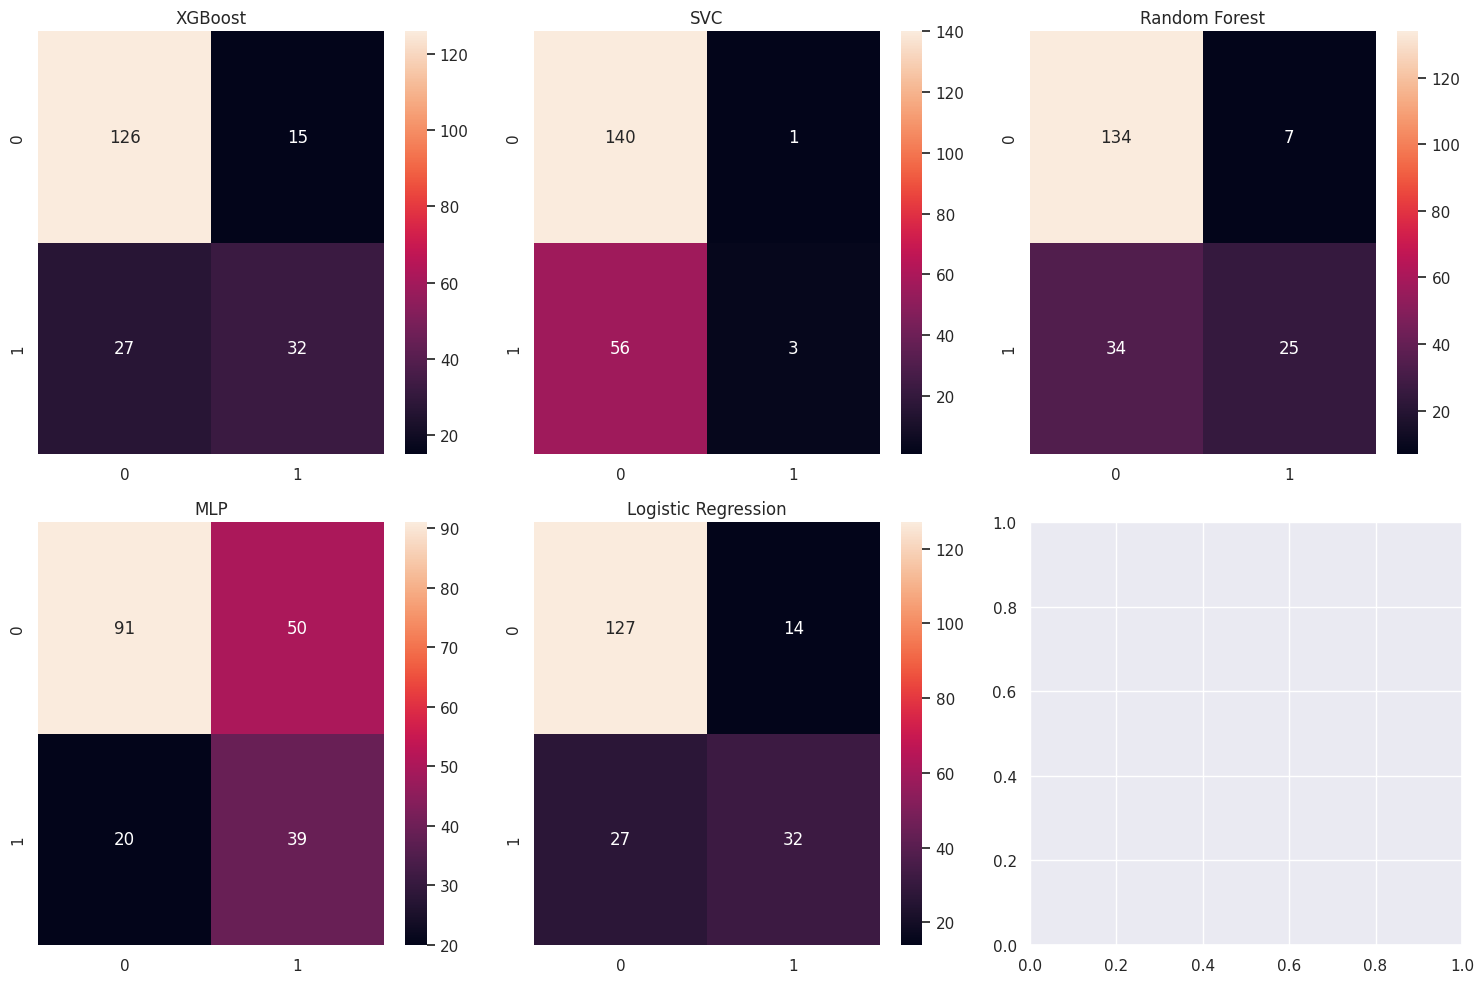

In [ ]:
# Define the models dictionary
models = {
    'XGBoost': xgb_clf,
    'SVC': svc_clf,
    'Random Forest': rf_clf,
    'MLP': nn_clf,
    'Logistic Regression': lr_clf
}

# Generate confusion matrices for each model
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
for ax, (name, model) in zip(axes.flatten(), models.items()):
    y_pred = model.predict(X_test)  # Use encoded data for prediction
    cm = confusion_matrix(y_test, y_pred)  # Compare against adjusted targets
    sns.heatmap(cm, annot=True, fmt='d', ax=ax)
    ax.set_title(name)
plt.tight_layout()
plt.show()

##XGBoost
* True Positives (TP): 32 - The number of positive instances (1) correctly classified as positive.
* True Negatives (TN): 126 - The number of negative instances (0) correctly classified as negative.
* False Positives (FP): 15 - The number of negative instances incorrectly classified as positive.
* False Negatives (FN): 27 - The number of positive instances incorrectly classified as negative.

##SVC (Support Vector Classifier)
* TP: 3 - The model correctly predicted '1' for 3 instances.
* TN: 140 - The model correctly predicted '0' for 140 instances.
* FP: 1 - The model incorrectly predicted '1' when it was actually '0'.
* FN: 56 - The model incorrectly predicted '0' when it was actually '1'.

##Random Forest
* TP: 25 - The model correctly predicted '1' for 25 instances.
* TN: 134 - The model correctly predicted '0' for 134 instances.
* FP: 7 - The model incorrectly predicted '1' when it was actually '0'.
* FN: 34 - The model incorrectly predicted '0' when it was actually '1'.

##MLP (Multilayer Perceptron)
* TP: 39 - The model correctly predicted '1' for 39 instances.
* TN: 91 - The model correctly predicted '0' for 91 instances.
* FP: 50 - The model incorrectly predicted '1' when it was actually '0'.
* FN: 20 - The model incorrectly predicted '0' when it was actually '1'.

##Logistic Regression
* TP: 32 - The model correctly predicted '1' for 32 instances.
* TN: 127 - The model correctly predicted '0' for 127 instances.
* FP: 14 - The model incorrectly predicted '1' when it was actually '0'.
* FN: 27 - The model incorrectly predicted '0' when it was actually '1'.

#Accuracy, Precision, Recall, F1 Score

**Accuracy** for each model can be calculated as:

$$ \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} $$

**Precision**, which is the ability of the classifier not to label a negative instance as positive, is:

$$ \text{Precision} = \frac{TP}{TP + FP} $$

**Recall**, also known as sensitivity or true positive rate, which is the ability of the classifier to find all the positive instances, is:

$$ \text{Recall} = \frac{TP}{TP + FN} $$

**The F1 score**, which is the harmonic mean of precision and recall, is:

$$ \text{F1 Score} = 2 \cdot \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $$





In [ ]:
# Dictionary to store model performance metrics
performance_metrics = {}

for name, model in models.items():
    # Generate predictions
    y_pred = model.predict(X_test)  # Make sure this is the encoded version of X_test

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)  # Make sure y_test is binary [0,1]
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store the metrics
    performance_metrics[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Convert the dictionary to a pandas DataFrame for a neat table format
metrics_df = pd.DataFrame(performance_metrics).T  # Transpose to have models as rows

# Display the DataFrame
print(tabulate(metrics_df, headers='keys', tablefmt='psql', floatfmt=".2f"))

+---------------------+------------+-------------+----------+------------+
|                     |   Accuracy |   Precision |   Recall |   F1 Score |
|---------------------+------------+-------------+----------+------------|
| XGBoost             |       0.79 |        0.68 |     0.54 |       0.60 |
| SVC                 |       0.71 |        0.75 |     0.05 |       0.10 |
| Random Forest       |       0.80 |        0.78 |     0.42 |       0.55 |
| MLP                 |       0.65 |        0.44 |     0.66 |       0.53 |
| Logistic Regression |       0.80 |        0.70 |     0.54 |       0.61 |
+---------------------+------------+-------------+----------+------------+


#ROC Curve for Each Model


The following code cell generates a Receiver Operating Characteristic (ROC) curve for each of the trained classification models. The ROC curve is a plot that represents the performance of a binary classification system. The curve is created by plotting the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings.

The Area Under the Curve (AUC) metric is also calculated for each classifier. The AUC represents the classifier's ability to discriminate between positive and negative classes. An AUC of 0.5 suggests no discriminative ability (equivalent to random guessing), while an AUC of 1.0 represents a perfect classifier.

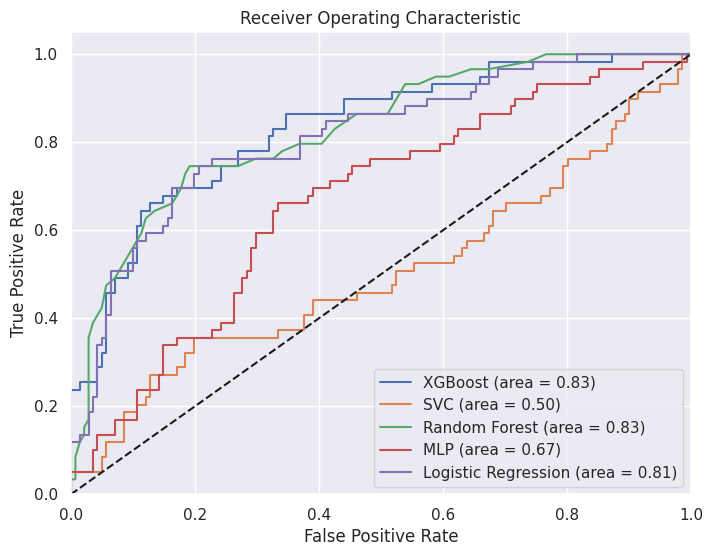

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
for name, model in models.items():
    # Check if model supports probability predictions or use decision function as fallback
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]
    else:
        y_score = model.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, label=f'{name} (area = {roc_auc:.2f})')

ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic')
ax.legend(loc="lower right")
plt.show()

The ROC curves for each classifier are displayed in the figure above. The key points to note are:

* The True Positive Rate (TPR), which is on the y-axis, indicates the proportion of actual positives correctly identified by the classifier.
* The False Positive Rate (FPR), on the x-axis, indicates the proportion of actual negatives incorrectly identified as positives.
* Each line in the plot corresponds to a different classifier's ROC curve, demonstrating the trade-off between TPR and FPR for various threshold settings.
* The Area Under the Curve (AUC) value is given in the legend for each classifier. Higher AUC values indicate better model performance.

From the plotted ROC curves, we can compare the classifiers' performance. A curve closer to the top-left corner indicates a better performing classifier. The dashed diagonal line represents the ROC curve of a purely random classifier; a useful model's ROC curve will appear above this line, indicating better-than-random performance.

Interpretation of the results:

* The models XGBoost and Random Forest show high AUC values, suggesting a strong discriminative ability between the classes.
* Logistic Regression performs slightly less effectively but still demonstrates a good level of discrimination.
* The MLP (Multilayer Perceptron) has a lower AUC, indicating moderate performance.
* The SVC (Support Vector Classifier) has an AUC equal to 0.50, implying it performs no better than a random classifier. This may necessitate a review of the model's parameters or the data suitability for the SVC method.

#Conclusion

The models we’ve discussed and their performance metrics are particularly pertinent in the context of credit risk assessment. Here's how their implications could be understood:

* XGBoost and Random Forest: High accuracy and F1 scores suggest that these models are fairly reliable in distinguishing between low-risk and high-risk credit applicants. This means they could be used to minimize the risk of default by accurately identifying risky loan applicants.

* Support Vector Classifier (SVC): The low recall for the positive class indicates that while the SVC might avoid false positives (classifying a bad credit risk as good), it could miss many high-risk applicants (false negatives), potentially leading to unexpected losses.

* Multilayer Perceptron (MLP): The modest performance of the MLP could be a concern as it may suggest a higher rate of misclassification, which in a credit risk context could mean granting credit to applicants who are likely to default or denying credit to potentially reliable borrowers.

* Logistic Regression: With a good balance between precision and recall, logistic regression might be a strong candidate for a production model in credit risk assessment, especially if interpretability of model decisions is a priority.

#Impact on Credit Risk:

* Class Imbalance: Most datasets in credit risk are inherently imbalanced since the number of defaulting loans is typically less than the non-defaulting ones. Models that perform well on imbalanced datasets are crucial in this domain.

* False Positives vs. False Negatives: In credit risk, the cost of false negatives (failing to identify a bad loan) might be higher than the cost of false positives (incorrectly identifying a good loan as bad), as the former directly leads to financial loss. Thus, a model's recall for the positive class is an essential metric.

* Model Interpretation: Regulatory requirements in the financial industry often necessitate transparent decision-making processes, favoring models that offer interpretability alongside performance.

* Decision Thresholds: Adjusting the decision threshold of a model can have a significant impact on the balance between precision and recall, which might be tuned to reflect the risk appetite of the financial institution.

In conclusion, while all models provide valuable insights into credit risk, the final model selection should be based on a cost-benefit analysis that weighs the financial impact of false positives and false negatives and considers regulatory compliance and business objectives. The analytical insights provided by these models form the foundation for developing a robust strategy for credit risk management.





